# Aaltopaketin aikakehitys

Tarkastellaan aaltopaketin leviämistä yhdessä ulottuvuudessa, esimerkiksi pisaran putoamisen aiheuttamaa aaltoa kapeassa kourussa olevan veden pinnalla, tai vaikka jokeen pudonneen kiven aiheuttamaa hyökyaaltoa joen pituussuunnassa. Aaltojen käyttäytyminen määräytyy niiden dispersiorelaatiosta, eli aallon etenemisnopeuden riippumisesta sen aallonpituudesta tai aaltoluvusta. Tehtävän tarkoitus on ensisijaisesti havainnoida aaltojen käyttäytymistä, hahmottaa hieman Fourier-muunnoksen ideaa sekä tehdä data-analyysiä.

Tässä projektissa tarkastellaan yksiulotteista tapausta, jossa aallon ajatellaan olevan 'laatikossa' jonka pituus on L. Määritellään ensiksi systeemimme eli 'laatikko' jota varten jaamme
x-akselin välin (-L/2,L/2) diskreeteiksi pisteiksi. Koska haluamme kaiken näyttävän sileältä, tarvitaan pisteitä paljon. Valitaan laatikon pituudeksi L = 100 ja jaetaan se 10000 pisteeseen.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams['text.usetex'] = True

L = 100.0
xvals = np.linspace(-L/2,L/2,10000)

Fontconfig error: Cannot load default config file: No such file: (null)


Määritellään seuraavaksi Gaussin funktion muotoinen aaltopakettimme
\begin{equation}
 y(x) = \frac{1}{2\pi} e^{-x^2/2}.
\end{equation}

In [2]:
y_x = [1.0/np.sqrt(2.0*np.pi)*np.exp(-0.5*x**2) for x in xvals]

Plotataan vielä aaltopakettimme kuvaaja niin näemme miltä se oikeasti näyttää.

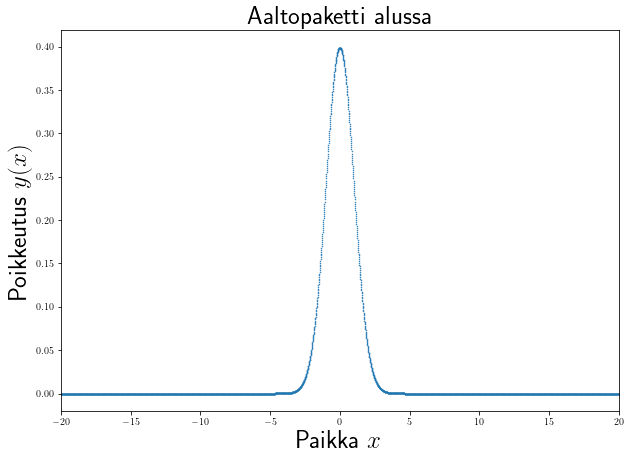

In [3]:
plt.figure(figsize=(10,7))
plt.plot(xvals,y_x,'.',markersize=1)
plt.title("Aaltopaketti alussa",fontsize=25)
plt.xlabel(r"Paikka $x$",fontsize=25)
plt.ylabel(r"Poikkeutus $y(x)$",fontsize=25)
plt.xlim([-20,20])
plt.show()

No sehän näyttää ihan hyvältä. Aaltopaketti on alussa aika kapea Gaussinen piikki. Huomatkaa, että pistetiheys on meillä riittävän suuri, sillä kuvaaja näyttää sileältä vaikka siinä on piirrettynä ainoastaan datapisteet eikä kuvaajassa edes näytetä koko määrittelyaluetta $x \in [-50,50]$.

$\color{red}{\text{Mikä olisi tämän aaltopaketin aallonpituus? Voidaanko sellaisesta edes puhua?}}$
$\color{red}{\text{Ja jos ei, niin miten sitten pystyisimme määrittämään tämän aaltopaketin etenemisnopeuden?}}$

## Fourier muunnos

Seuraavaksi tehdään aaltopaketille Fourier-muunnos. Fourier muunnoksen ajatus on esittää aaltopaketti yksinkertaisten sin- ja cos-funktioiden sarjakehitelmänä. Tähän tapaan:
\begin{equation}
   y(x) = \sum_{n=0}^\infty \alpha_n \sin(k_n x) + \beta_n \cos (k_n x),
\end{equation}
missä $k_n = 2n\pi/L$ on $n$:s aaltoluku.
Tämän sarjakehitelmän yllättävä ominaisuus on, että se toimii lähes tulkoon millä tahansa fysikaalisesti mielekkäällä aaltopaketilla $y(x)$. Fysiikassa erityisesti aaltopakettimme ovat aina jatkuvia ja yleensä myös derivoituvia funktioita joille Fourier-muunnos toimii oikein hyvin. Fourier-muunnoksessa tehtävänä on löytää yhtälön oikealla puolella olevat painokertoimet, eli Fourier-kertoimet, $\alpha_n$ ja $\beta_n$ missä $n=0,1,\ldots$.

Jotta näkee Fourier-muunnoksen hyödyllisyyden, on tärkeää ymmärtää mitä yhtälön oikealla puolella lukee. Sehän on harmonisten (sin- ja cos-) funktioiden lineaarikombinaatio! Yhtälön oikean puolen aikakehitys voidaan siis ymmärtää toisistaan riippumattomien harmonisten funktioiden aikakehityksenä ja näiden lineaarikombinaationa saadaan lopulta yhtälön vasemman puolen, eli alkuperäisen aaltopaketin aikakehitys.

Tässä projektissa aaltopaketti on parillinen funktio (eli sille pätee $y(x) = y(-x)$) jolloin Fourier-sarjakehitelmämme hieman yksinkertaistuu sillä kaikki kertoimet $\alpha_n$ ovat nollia. Eli Fourier-muunnoksessa katoavat kaikki $\sin$-funktiot.

Menemättä nyt sen syvemmälle Fourier-muunnoksen teoriaan, niin käytännössä Fourier-kertoimet saadaan laskemalla kaikkia lukuja $n=0,1,\ldots$ kohden integraali
\begin{equation}
  \beta_n = \frac{2}{L} \int_{-L/2}^{L/2} y(x) \cos(k_n x) dx  = \frac{2}{L} \int_{-L/2}^{L/2} y(x) \cos(\frac{2n\pi x}{L}) dx.
\end{equation}
Jos aaltofunktiomme ei olisi parillinen, pitäisi meidän laskea myös $\alpha_n$ kertoimet, jotka ovat
\begin{equation}
  \alpha_n = \frac{2}{L} \int_{-L/2}^{L/2} y(x) \sin(k_n x) dx  = \frac{2}{L} \int_{-L/2}^{L/2} y(x) \sin(\frac{2n\pi x}{L}) dx.
\end{equation}
$\color{red}{\text{Tarkistakaa että parilliselle aaltopaketille $y(x)$ kertoimet $\alpha_n$ ovat tosiaan nolla.}}$
Käytännössä Fourier sarjakehitelmässä riittää kuitenkin laskea vain 'riittävän' monta Fourier-kerrointa ja tässäkin projektissa lasketaan vain sata ensimmäistä Fourier-kerrointa. Sarjakehitelmä ei tällöin ole aivan 'tarkka' mutta sangen hyvä approksimaatio, kuten tulemme näkemään.

Integrointi toteutetaan tässä trapz(y(x),x)-funktiolla, joka laskee y(x):n 
integraalin yli muuttujan x trapezoidi-menetelmällä. Kyseessä on määrätty
integraali, jossa integroimisalueena on x-muuttujan määrittelyväli. 
Saadut painokertoimet, eli Fourier kertoimet, tallennetaan listaan $\beta$.

In [4]:
kvals = [2*np.pi/L*n for n in range(101)]
beta = [(2.0/L)*np.trapz(y_x*np.cos(k*xvals),xvals) for k in kvals]

Hyvä! Olette saaneet laskettua nyt aaltopakettimme Fourier-muunnoksen! Piirretään saadut Fourier-kertoimet.

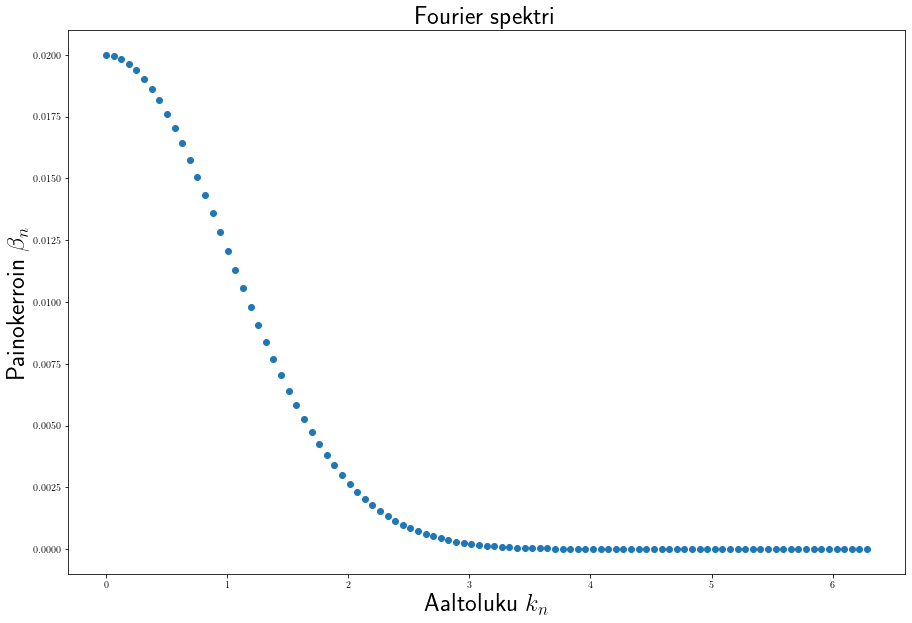

In [5]:
plt.figure(figsize=(15,10))
plt.plot(kvals,beta,'o')
plt.title("Fourier spektri",fontsize=25)
plt.xlabel(r"Aaltoluku $k_n$",fontsize=25)
plt.ylabel(r"Painokerroin $\beta_n$",fontsize=25)
plt.show()

Huomatkaa, että ensinnäkin aaltoluvut muodostavat diskreetin pisteistön $k_n = 2n\pi/L$. Fourier-muunnettu funktio
muodostaakin epäjatkuvan pistejoukon, missä pisteistön tiheys riippuu alkuperäisen aaltopaketin $y(x)$ määrittelyjoukon
pituudesta, eli laatikkomme koosta $L$. Mitä suurempi $L$, sitä tiheämpi on aaltolukujen $k_n$ pisteistö.

Lisäksi huomatkaa, että laskemamme sata Fourier-kerrointa ovat aivan tarpeeksi jotta voimme esittää aaltopakettimme hyvällä approksimaatiolla Fourier-kertoimien avulla. Tämä nähdään siitä, että kertoimet $\beta_n$ muodostavat laskevan käyrän joka lähestyy nollaa. Toki kertoimia voi laskea vielä pidemmällekin ja varmistua että ne tosiaan menevät nollaan mutta meillä on kyllä parempiakin tapoja varmistua approksimaatiomme hyvyydestä.


## Analyysiä

Aaltopaketti on nyt esitetty harmonisten funktioiden sarjana. 
Katsotaan askel askeleelta miten tuo alkuperäinen aaltopaketti rakentuu
näistä harmonisista funktiosta. Käytämme siis alkuperäistä funktion esitystä
\begin{equation}
   y(x) = \sum_{n=0}^\infty \beta_n \cos(k_nx),
\end{equation}
mutta lasketaan vain summan $N$ ensimmäistä termiä eli
\begin{equation}
  y_N(x) = \sum_{n=0}^N \beta_n \cos  (k_n x).
\end{equation}

Määritellään ensiksi funktio inverse_transform(...), joka laskee meille yo. summauksen eli käänteisen Fourier-muunnoksen.

In [6]:
def inverse_transform(beta,kvals,xvals,N):
    nvals = list(range(N))
    yt = [0.5*beta[0] + sum([beta[n]*np.cos(kvals[n]*x) for n in nvals[1:]]) for x in xvals]
    return yt

Funktion inverse_transform(...) viimeinen parametri (N) kertoo kuinka monta termiä summauksessa lasketaan. Katsotaan miltä esimerkiksi funktio näyttäisi jos summauksessa laskettaisiin vain kolme ensimmäistä termiä:

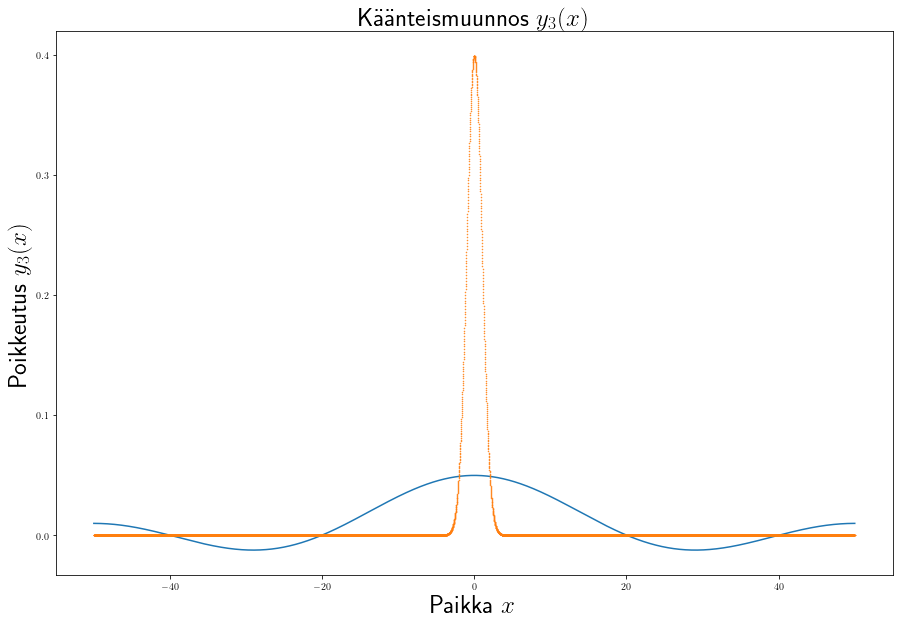

In [7]:
y_new = inverse_transform(beta,kvals,xvals,3)
plt.figure(figsize=(15,10))
plt.title(r"Käänteismuunnos $y_3(x)$",fontsize=25)
plt.xlabel(r"Paikka $x$",fontsize=25)
plt.ylabel(r"Poikkeutus $y_3(x)$",fontsize=25)
plt.plot(xvals,y_new)
plt.plot(xvals,y_x,'.',markersize=1)
plt.show()


Kuvaajassa näkyy myös alkuperäinen aaltopakettimme $y(x)$, mutta approksimaatiomme $y_3(x)$ ei näytä kauhean lupaavalta. Entä jos termejä olisi kymmenen?

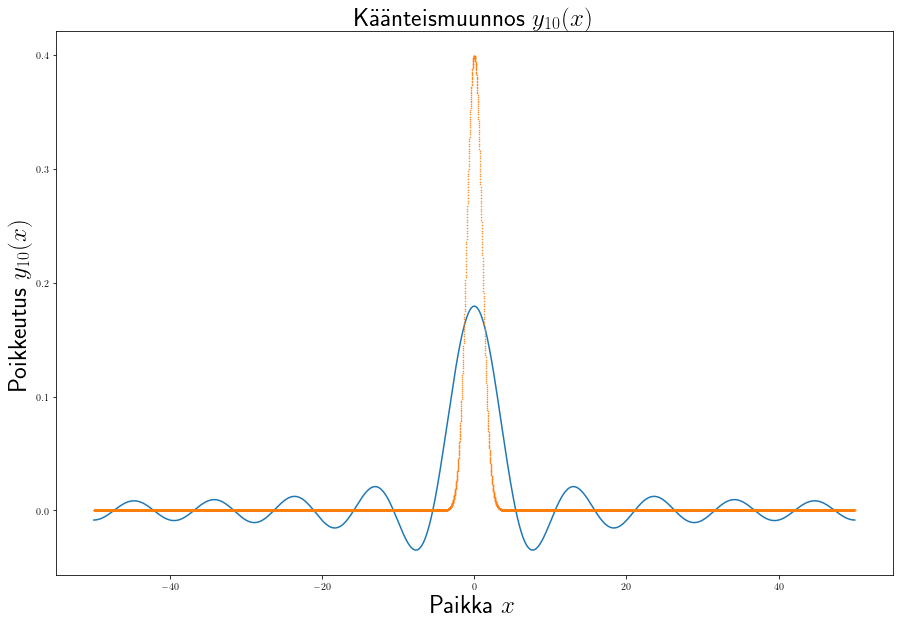

In [8]:
y_new = inverse_transform(beta,kvals,xvals,10)
plt.figure(figsize=(15,10))
plt.title(r"Käänteismuunnos $y_{10}(x)$",fontsize=25)
plt.xlabel(r"Paikka $x$",fontsize=25)
plt.ylabel(r"Poikkeutus $y_{10}(x)$",fontsize=25)
plt.plot(xvals,y_new)
plt.plot(xvals,y_x,'.',markersize=1)
plt.show()

No se on jo parempi. Entä jos termejä olisi viisikymmentä?

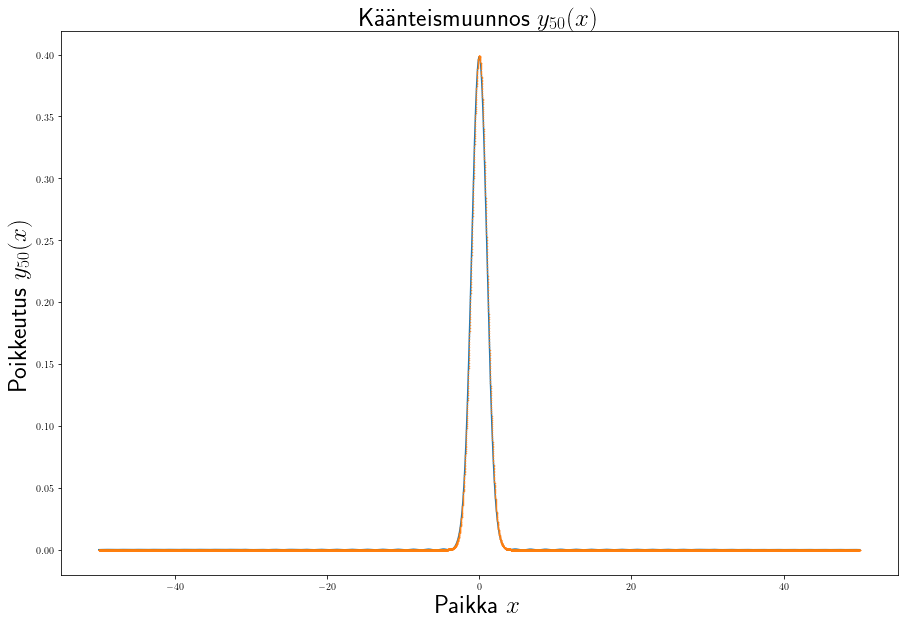

In [9]:
y_new = inverse_transform(beta,kvals,xvals,50)
plt.figure(figsize=(15,10))
plt.title(r"Käänteismuunnos $y_{50}(x)$",fontsize=25)
plt.xlabel(r"Paikka $x$",fontsize=25)
plt.ylabel(r"Poikkeutus $y_{50}(x)$",fontsize=25)
plt.plot(xvals,y_new)
plt.plot(xvals,y_x,'.',markersize=1)
plt.show()

No se on tosi hyvä. Tässä kannattaa pitää mielessä se miten tämäkin kuvaaja on rakentunut: siinä on summattu viisikymmentä eriaallonpituuksista cos-funktiota. Jokainen näistä cos-funktioista on vain tuttua oskillointia koko välillä $x \in [-50,50]$, mutta kun ne kaikki lasketaan (sopivilla painokertoimilla $\beta_n$) yhteen saadaan jotakin mikä on piikittynyt $x=0$:n ympäristöön. Eli kaikki nuo cos-funktiot ovat kumonneet toisensa muualla. 
Kokeillaan vielä sadalla termillä (enempää ei kertoimia $\beta_n$ ole laskettukaan!)

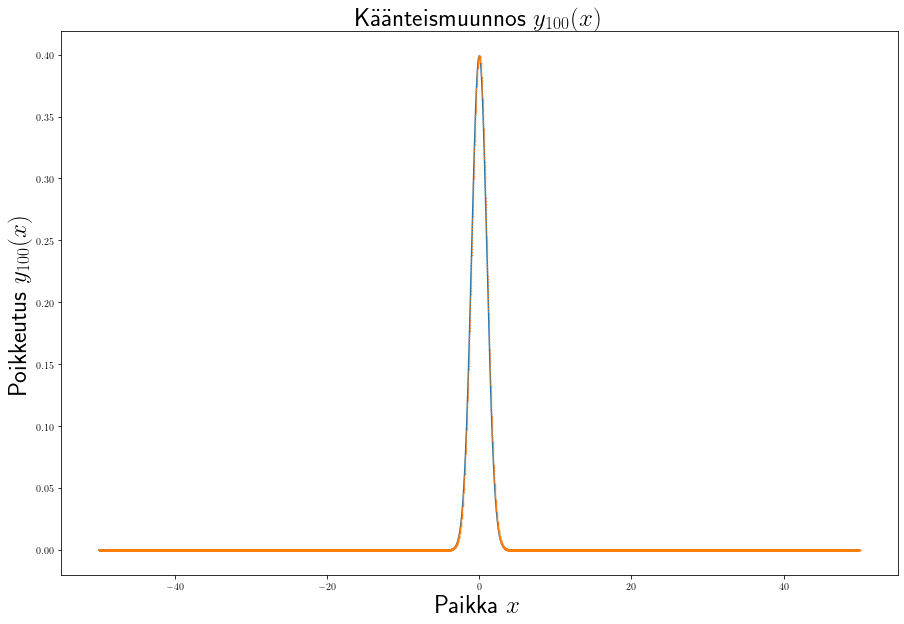

In [10]:
y_new = inverse_transform(beta,kvals,xvals,100)
plt.figure(figsize=(15,10))
plt.title(r"Käänteismuunnos $y_{100}(x)$",fontsize=25)
plt.xlabel(r"Paikka $x$",fontsize=25)
plt.ylabel(r"Poikkeutus $y_{100}(x)$",fontsize=25)
plt.plot(xvals,y_new)
plt.plot(xvals,y_x,'.',markersize=1)
plt.show()

No se näyttää jo tosi samalta kuin alkuperäinen aaltopakettimme eli selvästi sata termiä riitti. 

Nyt meillä on siis alkuperäisen aaltopaketin esitys Fourier-kertoimien $\beta_n$ avulla ja lisäksi meillä on käänteiskuvaus jolla voimme siirtyä Fourier-kertoimista takaisin aaltofunktion paikkaesitykseen.

Seuraavaksi meidän pitää selvittää se, miten kukin harmoninen aalto $\cos (k_n x)$ kehittyy ajan funktiona.

## Harmonisen aallon aikakehitys

Aikakehitystä varten todetaan ensin, että alkeisaallon $\cos(k_n x)$ aallonpituus on $\lambda_n = \frac{2\pi}{k_n} = \frac{L}{n}$. Aalloille pätee yleisesti taajuuden, nopeuden ja aallonpituuden välinen relaatio $c_n = f_n\lambda_n$ ($\color{red}{\text{Perustelkaa tämä!}}$). Relaatiossa on mukana alaindeksi $n$ myös nopeudessa ja taajuudessa, koska yleisesti ne voivat riippua aallonpituudesta $\lambda_n$. Kirjoitetaan tämä lukiosta tuttu relaatio mieluummin aaltoluvun $k_n$ ja kulmataajuuden $\omega_n=2\pi f_n$ avulla, eli $c_n = \omega_n/k_n$. 

Alkeisaalto $\cos(k_nx)$ värähtelee siis kulmataajuudella $\omega_n$. Tämä aikariippuvuus saadaan kuvattua yleistämällä alkeisaalto näin
\begin{equation}
  \cos(k_nx - \omega_n t),
\end{equation}
joka kuvaisi nyt oikealle etenevää aaltoa. Vastaavasti vasemmalle etenevä aalto olisi
\begin{equation}
  \cos(k_n x + \omega_n t).
\end{equation}
Koska alkuperäinen aaltopakettimme on symmetrinen oikean ja vasemman suunnan suhteen, on aallon aikakehitys näiden kahden eri suuntiin etenevien aaltojen superpositio (tai lineaarikombinaatio) eli
\begin{equation}
  \frac{1}{2} \left[\cos(k_n x - \omega_n t) + \cos(k_n x + \omega_n t)\right]
\end{equation}
Tämä voidaan trigonometristen funktioiden yhteenlaskusääntöjä käyttäen muokata muotoon
\begin{equation}
  \cos(k_n x) \cos(\omega_n t).
\end{equation}
Kun tätä sovelletaan alkuperäiseen Fourier-kehitelmäämme
\begin{equation}
  y(x) = \sum_n \beta_n \cos(k_n x),
\end{equation}
saadaan
\begin{eqnarray}
  y(x,t) &=& \sum_n \beta_n \cos(k_n x) \cos(\omega_n t).
\end{eqnarray}

Eli kuten alussa ennakoitiin, mielivaltaisen aaltopaketin $y(x)$ aikakehitys saadaan määritettyä laskemalla aaltopaketin Fourier-kertoimet $\beta_n$, jotka kertovat millaisella painokertoimella kukin harmoninen aalto $\cos(k_n x)$ aaltopaketissa esiintyy. Nämä harmoniset aallot kehittyvät ajassa värähtelemällä kulmataajuudella $\omega_n$. Laskemalla näiden ajassa kehittyneiden harmonisten aaltojen lineaarikombinaation (samoilla painokertoimilla $\beta_n$!) saadaan koko aaltopaketin aikakehitys.

Ainoa mitä meiltä enää puuttuu on määrittää kulmataajuudet $\omega_n$, jotka määräytyvät suoraan dispersiorelaatiosta.


## Dispersiorelaatio

Ilmiönä aaltojen dispersiossa, eli hajaantumisessa, on kyse siitä että rajapinnalle saavuttaessa eri aallonpituuden taittuvat eri määrän. Tämä on kuitenkin seurausta siitä perustavanlaatuisesta ilmiöstä, että väliaineessa eri aallonpituudet etenevät eri nopeudella. Olettekin jo aiemmin perehtyneet esimerkkeinä syvän veden aaltojen etenemisnopeuteen
\begin{equation}
   v_\mathrm{syvä} = \sqrt{\frac{g\lambda}{2\pi}},
\end{equation}
missä $\lambda$ on aallonpituus ja $g$ putoamiskiihtyvyys. Ja matalassa vedessä aaltojen etenemisnopeus oli
\begin{equation}
  v_\mathrm{matala} = \sqrt{gh},
\end{equation}
missä $h$ on veden syvyys. 
Huomaamme siis, että syvässä vedessä aaltojen etenemisnopeus riippuu aallonpituudesta kun taas matalassa vedessä ei riipu. Toinen tuttu esimerkki aallosta jonka etenemisnopeus ei riipu aallonpituudesta on ilmassa etenevä ääni.

Kun puhutaan aallon etenemisnopeudesta aallonpituuden funktiona, on oletuksena aina että kyseessä on harmoninen aalto. Tämä ääneen monesti lausumaton oletus johtuu yksinkertaisesti siitä, että ainoastaan harmonisilla aalloilla, esim. $\cos(2\pi x/\lambda)$ on yksikäsitteinen aallonpituus $\lambda$. Toisaalta, koska harmonisella aallolla on nyt siis tunnettu aallonpituus $\lambda$ niin jos lisäksi tiedämme ko. aallon etenemisnopeuden $c$, pystymme määrittämään ko. aallon värähdystaajuuden $f=c/\lambda$. Pitää vain muistaa että riippuen aallosta ja väliaineesta, voi aallon etenemisnopeus siis riippua aallonpituudesta, eli $c$ ei välttämättä ole vakio.

$\color{red}{\text{Määrittäkää nyt syvän veden ja matalan veden aaltojen dispersiorelaatio}}$
$\color{red}{\text{eli miten ko. aallon kulmataajuus $\omega$ riippuu aallon aaltoluvusta $k$.}}$

Lopputuloksena teidän pitäisi saada relaatiot
\begin{equation}
    \omega_\mathrm{syvä}(k) = \sqrt{gk}
\end{equation}
ja
\begin{equation}
  \omega_\mathrm{matala}(k) = k\sqrt{gh}.
\end{equation}

In [11]:
gacc = 9.81
h0 = 1.0
  
angfreq_syva_n = [np.sqrt(gacc*k) for k in kvals]
angfreq_matala_n = [np.sqrt(gacc*h0)*k for k in kvals]

Piirretään näitä syvän ja matalan veden aaltoja vastaavat dispersiorelaatiot. 

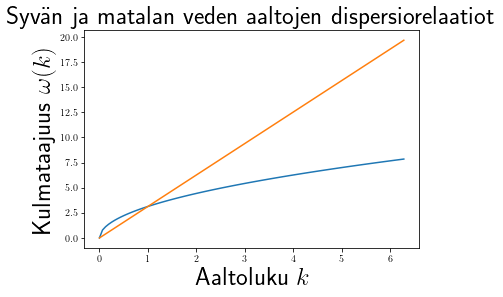

In [12]:
plt.plot(kvals,angfreq_syva_n)
plt.plot(kvals,angfreq_matala_n)
plt.title("Syvän ja matalan veden aaltojen dispersiorelaatiot",fontsize=25)
plt.xlabel(r"Aaltoluku $k$",fontsize=25)
plt.ylabel(r"Kulmataajuus $\omega(k)$",fontsize=25)
plt.show()

## Fourier muunnoksen aikakehitys


Tiedämme miten kukin harmoninen alkeisaalto $\cos(k_n x)$ käyttäytyy
ajan funktiona -- ne kaikki oskilloivat vain ajassa kulmataajuudella $\omega_n = \omega(k_n)$, joka
riippuu aaltoluvusta $k_n$ edellä määritellyn dispersiorelaation kautta.

Lopuksi haluamme tietää miltä aaltopaketti näyttää alkuperäisessä
paikka-avaruudessa, eli $x$:n funktiona. Meidän pitää tehdä siis käänteinen
Fourier muunnos, tai siis yksinkertaisesti hyödyntää alkuperäistä
funktion sarjaesitystä
\begin{equation}
   y(x,t) = \sum_n \beta_n \cos(k_n x) \cos(\omega_n x)
\end{equation}
Nyt meillä on kaikki palat valmiina aaltopaketin aikakehityksen laskemiseen. 
Katsotaan ensiksi miten Gaussinen aaltopakettimme leviää syvässä vedessä.
Laskenta kestää hetken, malttakaa mielenne.

Koodi esittää animaation aaltopaketin aikakehityksestä. Simulaatio jatkuu ajan hetkeen $t=20$ asti. 
$\color{red}{\text{Tunnistakaa videosta miten pitkät aallonpituudet propagoivat nopeasti ja lyhyet aallonpituudet hitaammin.}}$

In [13]:
def evolve_fourier(beta,freq,t):
    nvals = list(range(len(beta)))
    return [beta[n]*np.cos(freq[n]*t) for n in nvals]

Progress: 0/20.
Progress: 1/20.
Progress: 2/20.
Progress: 3/20.
Progress: 4/20.
Progress: 5/20.
Progress: 6/20.
Progress: 7/20.
Progress: 8/20.
Progress: 9/20.
Progress: 10/20.
Progress: 11/20.
Progress: 12/20.
Progress: 13/20.
Progress: 14/20.
Progress: 15/20.
Progress: 16/20.
Progress: 17/20.
Progress: 18/20.
Progress: 19/20.


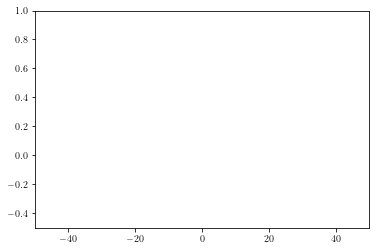

In [14]:
fig, ax = plt.subplots()
ax.set_xlim(-L/2,L/2)
ax.set_ylim(-0.5,1.0)

line, = ax.plot([])

def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num):
    beta_new = evolve_fourier(beta,angfreq_syva_n,frame_num*0.5)
    ynew = inverse_transform(beta_new,kvals,xvals,100)
    line.set_data(xvals,ynew)
    print("Progress: " + str(frame_num) + "/20.")
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=20,interval=500)
HTML(anim.to_html5_video())

Koska alkuperäinen aaltopaketti koostuu useasta eri aallonpituudesta, ja kukin aallonpituus etenee eri nopeudella, on luonnollista että aaltopaketti leviää tai hajoaa.
Tällaista väliainetta jossa aaltojen nopeus riippuu  tavalla tai toisella aallonpituudesta kutsutaan dispersoivaksi, eli hajoittavaksi väliaineeksi.

Esimerkiksi siis syvä vesi on siinä etenevien aaltojen kannalta dispersoiva väliaine.
Sama pätee myös esimerkiksi väliaineessa etenevään valoon, mihin perustuu esimerkiksi prisman valkoista valoa spektriksi hajoittava ominaisuus. 

Vastaavasti, jos nopeus ei riipu aallonpituudesta, on kyseessä ei-dispersoiva väliaine.
Ei-dispersoiva väliaine säilyttää aaltopakettien muodon. Tällaista on esimerkiksi valon eteneminen tyhjiössä ja äänen eteneminen ilmassa. 
Edellä tarkasteltiin vesiaaltoja syvän veden rajalla jolloin aaltopaketin havaittiin leviävän väliaineen dispersiivisyydestä johtuen.
Mutta veden dispersiivisyys riippuu veden syvyydestä. 
Seuraavaksi käytetään samaa koodia kuin edellä, mutta korvataan syvän veden aallot matalan veden aalloilla.

Progress: 0/50.
Progress: 1/50.
Progress: 2/50.
Progress: 3/50.
Progress: 4/50.
Progress: 5/50.
Progress: 6/50.
Progress: 7/50.
Progress: 8/50.
Progress: 9/50.
Progress: 10/50.
Progress: 11/50.
Progress: 12/50.
Progress: 13/50.
Progress: 14/50.
Progress: 15/50.
Progress: 16/50.
Progress: 17/50.
Progress: 18/50.
Progress: 19/50.
Progress: 20/50.
Progress: 21/50.
Progress: 22/50.
Progress: 23/50.
Progress: 24/50.
Progress: 25/50.
Progress: 26/50.
Progress: 27/50.
Progress: 28/50.
Progress: 29/50.
Progress: 30/50.
Progress: 31/50.
Progress: 32/50.
Progress: 33/50.
Progress: 34/50.
Progress: 35/50.
Progress: 36/50.
Progress: 37/50.
Progress: 38/50.
Progress: 39/50.
Progress: 40/50.
Progress: 41/50.
Progress: 42/50.
Progress: 43/50.
Progress: 44/50.
Progress: 45/50.
Progress: 46/50.
Progress: 47/50.
Progress: 48/50.
Progress: 49/50.


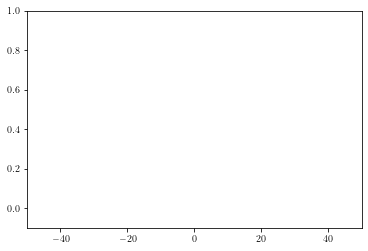

In [15]:
fig, ax = plt.subplots()
ax.set_xlim(-L/2,L/2)
ax.set_ylim(-0.1,1.0)

line, = ax.plot([])

def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num):
    beta_new = evolve_fourier(beta,angfreq_matala_n,frame_num*0.5)
    ynew = inverse_transform(beta_new,kvals,xvals,100)
    line.set_data(xvals,ynew)
    print("Progress: " + str(frame_num) + "/50.")
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=500)
HTML(anim.to_html5_video())

Koska aallon etenemisnopeus matalassa vedessä ei riipu aallonpituudesta, etenevät kaikki harmoniset aallot samalla nopeudella. Lopputuloksena aaltopaketti säilyttää muotonsa.
$\color{red}{\text{Miten tulkitsette mitä aaltopaketille tapahtuu kun se saavuttaa 'laatikon' reunan?}}$

Tarkastellaan vielä samaa matalan veden aaltojen etenemistä hieman toisesta näkökulmasta. Fourier-sarja koostuu cos- ja sin-funktioista jotka on helppo määritellä koko reaaliakselille $x \in \mathcal{R}$. Voimme siis luontevasti laajentaa funktiomäärittelyn 'laatikon ulkopuolelle'. Lasketaan miltä aaltopaketin laajeneminen näyttäisi jos tosiaan plottaamme Fourier sarjan laajemmalle $x$:n määrittelyalueelle ($x \in [-200:200]$).

Progress: 0/50.
Progress: 1/50.
Progress: 2/50.
Progress: 3/50.
Progress: 4/50.
Progress: 5/50.
Progress: 6/50.
Progress: 7/50.
Progress: 8/50.
Progress: 9/50.
Progress: 10/50.
Progress: 11/50.
Progress: 12/50.
Progress: 13/50.
Progress: 14/50.
Progress: 15/50.
Progress: 16/50.
Progress: 17/50.
Progress: 18/50.
Progress: 19/50.
Progress: 20/50.
Progress: 21/50.
Progress: 22/50.
Progress: 23/50.
Progress: 24/50.
Progress: 25/50.
Progress: 26/50.
Progress: 27/50.
Progress: 28/50.
Progress: 29/50.
Progress: 30/50.
Progress: 31/50.
Progress: 32/50.
Progress: 33/50.
Progress: 34/50.
Progress: 35/50.
Progress: 36/50.
Progress: 37/50.
Progress: 38/50.
Progress: 39/50.
Progress: 40/50.
Progress: 41/50.
Progress: 42/50.
Progress: 43/50.
Progress: 44/50.
Progress: 45/50.
Progress: 46/50.
Progress: 47/50.
Progress: 48/50.
Progress: 49/50.


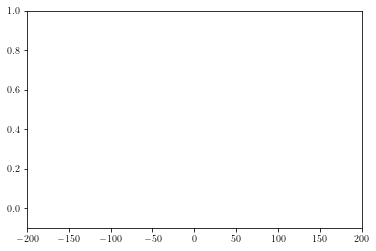

In [16]:
fig, ax = plt.subplots()
ax.set_xlim(-L*2,L*2)
ax.set_ylim(-0.1,0.5)

line, = ax.plot([])
xvals_wide = np.linspace(-2*L,2*L,10000)

def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num):
    beta_new = evolve_fourier(beta,angfreq_matala_n,frame_num*0.7)
    ynew = inverse_transform(beta_new,kvals,xvals_wide,100)
    line.set_data(xvals_wide,ynew)
    print("Progress: " + str(frame_num) + "/50.")
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=500)
HTML(anim.to_html5_video())

Nyt siellä on aaltopaketteja aivan vilisemällä! Muistakaa että alkuperäinen 'laatikkomme' oli määritelty välille $x \in [-50:50]$. $\color{red}{\text{Miten nyt tulkitsette sen mitä tapahtuu kun aaltopaketti saavuttaa tuon alkuperäisen laatikon reunan?}}$
Fourier muunnos onkin ensisijaisesti työkalu jaksollisten funktioiden esittämiseen. Käytännössä voimme kuitenkin määrittelyaluetta rajaamalla olla välittämättä 'muista ratkaisuista'.

Lopuksi vielä kertaus projektin pääkohdista, eli aaltopaketin aikakehityksen määritys koostuu seuraavista askeleista:
- aaltopaketin $y(x)$ alkuehto paikka-avaruudessa
- aaltopaketille tehdään Fourier-muunnos, eli aaltopaketti esitetään harmonisten aaltojen superpositiona
- harmonisten aaltojen aikakehitys lasketaan väliaineen dispersiorelaation mukaisesti
- aaltopaketin $y(x,t)$ aikakehitys saadaan Fourierin käänteismuunnoksella, eli yksinkertaisesti lasketaan ajassa kehitettyjen harmonisten aaltojen superpositio